# Clientes de tarjetas de crédito
Dataset tomado de Kaggle, cargado por [Sakshi Goyal](https://www.kaggle.com/sakshigoyal7/credit-card-customers). El objetivo principal de este dataset es predecir los clientes que van a abandonar el banco.

## Introducción
El gerente de un banco está consternado debido al creciente número de clientes que han abandonado las tarjetas de crédito. Los directivos estrán muy agradecidos si se puede predecir qué clientes van a decidir abandonar sus tarjetas de crédito, de esta manera ellos podrán ponerse en contacto con estos clientes para ofrecerles mejores servicios y cambiar su decisión para que permanezcan en el banco.

El dataset fue obtenido de la pagina https://leaps.analyttica.com/home .

El dataset contiene alrededor de 10,000 entradas con cerca de 18 características cada uno.

### Objetivo principal
El objetivo de este reporte es crear un modelo que pueda predecir de la mejor manera si un cliente va a suspender su servicio de tarjeta de credito.


## Análisis Exploratorio de Datos
Esta sección es de las más importantes a la hora de implementar modelos para calsificar o predecir valores, debido a que es el primer contacto con la base de datos de la cual vamos a tener la información necesaria para llevar a cabo la tarea u objetivo principal. 
En esta sección nos dedicamos a buscar valores nulos o atípicos en la base de datos, así como realizar una exploración y análisis estadísitico básico de la información con la que contamos.

Lo primero que haremos es cargar las librerias necesarias para llevar a cabo este análisis exploratorio de datos.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

El primer paso es cargar nuestra base de datos.

In [2]:
df = pd.read_csv('BankChurners.csv')

Para comenzar a familiarizarnos con la base de datos, uno de los primeros pasos es observar los primeros datos de la tabla con el método head().

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

Dentro de la descripción del dataset se indica que se eliminen las ultimas dos columnas de este dataset debido a que no forman parte de los datos a análizar. 

In [4]:
df.drop(df.columns[[-1,-2]],axis = 1, inplace = True)

De esta manera tenemos el dataset con los datos necesarios para llevar a cabo nuestro análisis. Obtendermos la información de las características de este dataset, de igual forma buscaremos por valores nulos.

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Esto nos muestra qué caracteristicas corresponden a valores categóricos y que características corresponden a valores numéricos. De igual manera podemos observar que no existen valores nulos en el dataset. De igual manera realizaremos análisis a fondo de los distintos valores para determinar si existen otra forma de valores nulos. Dada la información del dataset, el campo CLIENTNUM corresponde al número de cada cliente, por lo que es un valor único para cada cliente. Comenzaremos a manejar los datos cambiando el indice de nuestro dataframe por los valores del campo CLIENTNUM.

In [6]:
df.set_index(df.CLIENTNUM,inplace = True)
df.drop('CLIENTNUM', inplace = True, axis = 1)

Implementaremos una función para observar los valores existentes en las variables categoricas de este dataset.

In [7]:
def uni(data):
    df = data.select_dtypes(include = 'object')
    for col in df.columns:
        print(df[col].unique())
            
uni(df)

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


Podemos observar que existen algunos valores desconocidos, los cuales pueden ser considerados como valores nulos. Antes de considerarlos como tal, haremos una exploración gráfica de los datos.

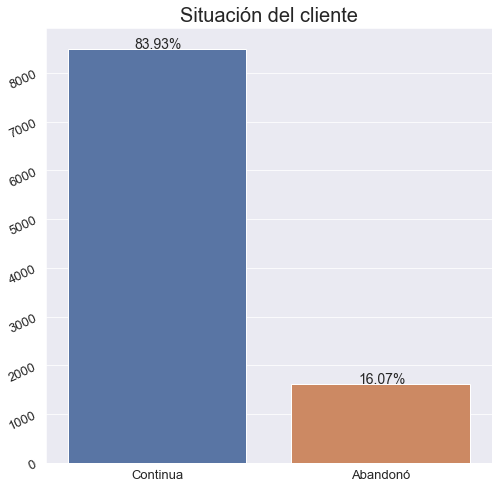

In [8]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.set_palette('deep')
sns.countplot(x = 'Attrition_Flag', data = df)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(ticks=[0,1], labels = ['Continua', 'Abandonó'],fontsize = 13)
plt.yticks(fontsize = 13, rotation = 25)
plt.text(x = -0.1, y = df.Attrition_Flag.value_counts()[0]+1, 
         s = "{:.2f}%".format((df.Attrition_Flag.value_counts()[0]/(len(df.Attrition_Flag)))*100),
         fontsize = 14)
plt.text(x = 0.9, y = df.Attrition_Flag.value_counts()[1]+1,
         s = "{:.2f}%".format((df.Attrition_Flag.value_counts()[1]/(len(df.Attrition_Flag)))*100),
         fontsize = 14)
plt.title('Situación del cliente', fontsize = 20);

Podemos observar que existe una gran cantidad de sesgo en los datos puesto que la gran mayoría de los datos (83.93%) corresponden a una categoría (clientes que continuan con el banco) mientras que la categoría con menor datos (clientes que abandonaron el banco), lo cual puede afectar el desempeño de los algoritmos de ML que se vayan a probar.

Seguiremos con el EDA.

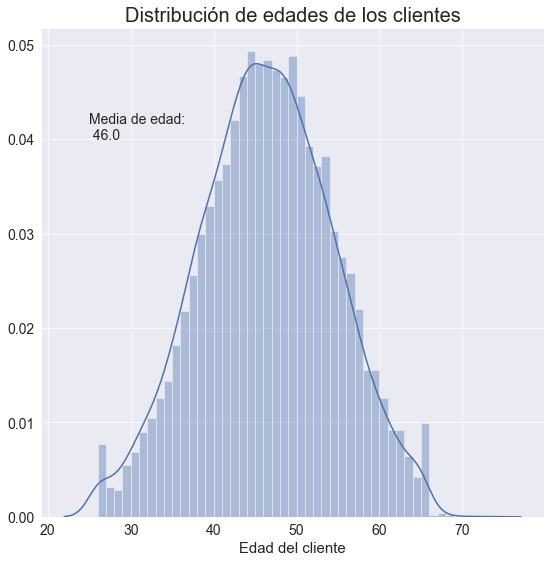

In [9]:
plt.figure(figsize=(9,9))
sns.distplot(df.Customer_Age)
plt.title('Distribución de edades de los clientes', fontsize = 20)
plt.xlabel('Edad del cliente', fontsize=15)
plt.text(25, 0.04, f'Media de edad:\n {df.Customer_Age.median()}', fontsize = 14);
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

En esta gráfica se muestra la distribución de las edades, no muestra ninguna anormalidad por lo que no requerirá un posterior tratemiento de datos.

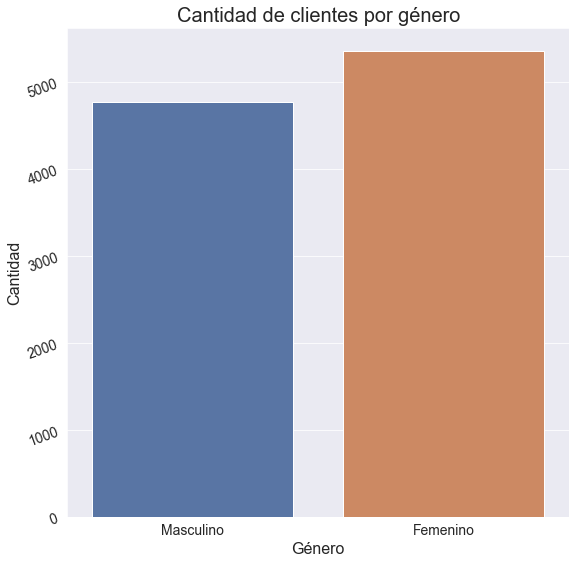

In [10]:
plt.figure(figsize = (9,9))
sns.countplot(x = 'Gender', data = df)
plt.title('Cantidad de clientes por género', fontsize = 20)
plt.xlabel('Género',fontsize = 16)
plt.ylabel('Cantidad', fontsize = 16);
plt.yticks(rotation = 20, fontsize = 14)
plt.xticks(ticks=[0,1], labels = ['Masculino', 'Femenino'], fontsize = 14);

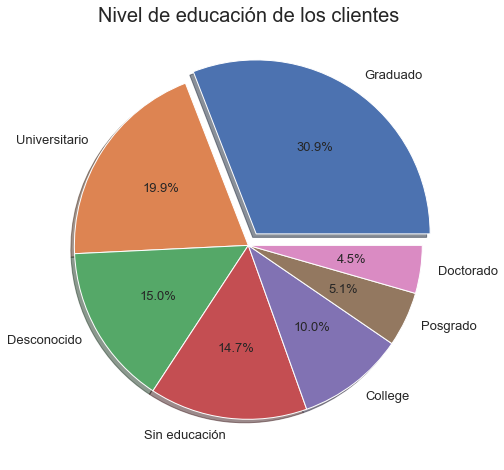

In [11]:
plt.figure(figsize = (8,8))
df.Education_Level.value_counts().plot(kind = 'pie',shadow = True, autopct='%1.1f%%',
                                       explode = [0.08,0,0,0,0,0,0], fontsize = 13,
                                      labels = ['Graduado', 'Universitario','Desconocido',
                                               'Sin educación', 'College', 'Posgrado',
                                               'Doctorado'])
plt.ylabel('')
plt.title('Nivel de educación de los clientes', fontsize = 20);


Se puede observar la mitad de de los usuarios (50.8%) del banco corresponden a usuarios profesionistas (Graduados) o por graduarse (Universitarios).

<ipython-input-12-5d3b38bc40d1>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], labels = ['Continúa', 'Abandonó'],


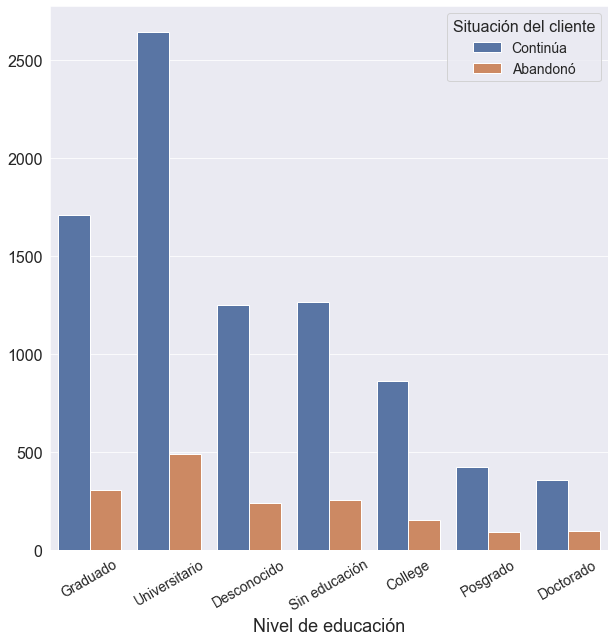

In [12]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Education_Level', hue = 'Attrition_Flag', data = df)
plt.xticks(ticks = [0,1,2,3,4,5,6],labels = ['Graduado', 'Universitario','Desconocido',
                    'Sin educación', 'College', 'Posgrado','Doctorado'], rotation = 30,
          fontsize = 14)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
           title = 'Situación del cliente', fontsize = 14,title_fontsize = 16);
plt.xlabel('Nivel de educación', fontsize = 18);
plt.yticks(fontsize = 16)
plt.ylabel(None);

<ipython-input-13-8731f1b0892a>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], labels = ['Continúa', 'Abandonó'],


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

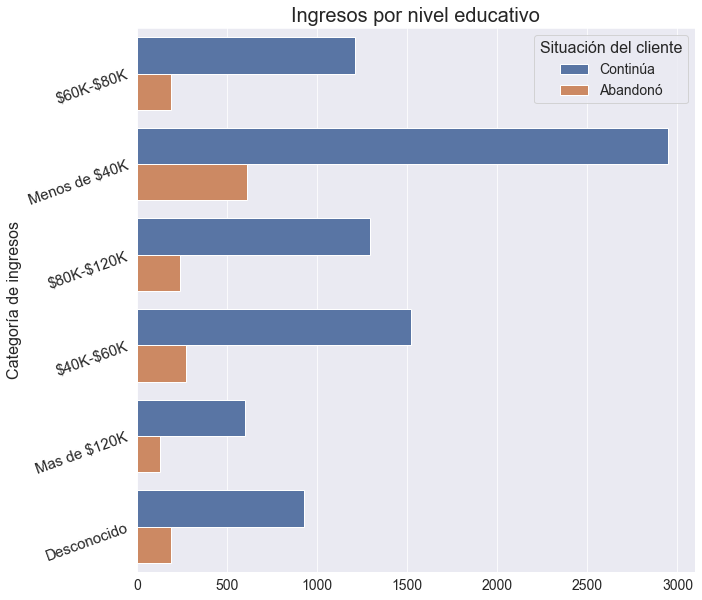

In [13]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'Income_Category',hue='Attrition_Flag', data = df)
plt.ylabel('Categoría de ingresos', fontsize = 16)
plt.xlabel(None)
plt.yticks(ticks=[0,1,2,3,4,5], labels = ['\$60K-\$80K', 'Menos de $40K', '\$80K-\$120K',
                                         '\$40K-\$60K', 'Mas de $120K', 'Desconocido'], 
           rotation = 20, fontsize = 15);
plt.title('Ingresos por nivel educativo', fontsize = 20)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
           title = 'Situación del cliente', fontsize = 14,title_fontsize = 16)
plt.xticks(fontsize = 14)

<ipython-input-14-257328bb055c>:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], labels = ['Continúa', 'Abandonó'],


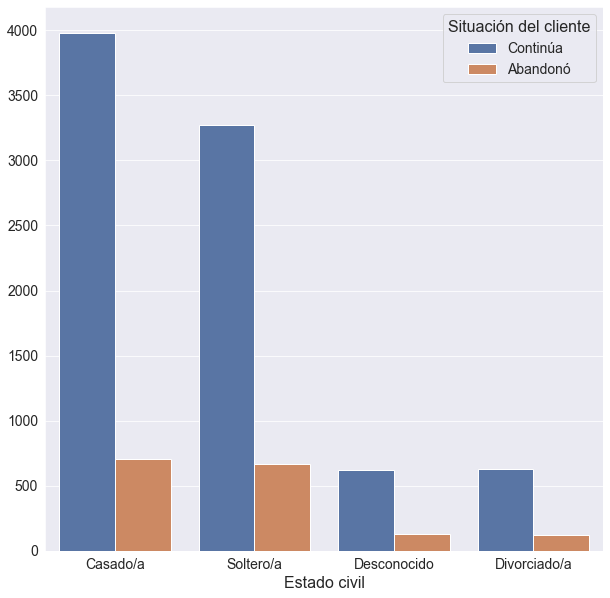

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'Marital_Status', hue = 'Attrition_Flag', data = df)
plt.xlabel('Estado civil', fontsize = 16)
plt.ylabel(None)
plt.xticks(ticks = [0,1,2,3], labels = ['Casado/a', 'Soltero/a', 'Desconocido', 'Divorciado/a'],
           fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
           title = 'Situación del cliente', fontsize = 14,title_fontsize = 16);

<Figure size 936x936 with 0 Axes>

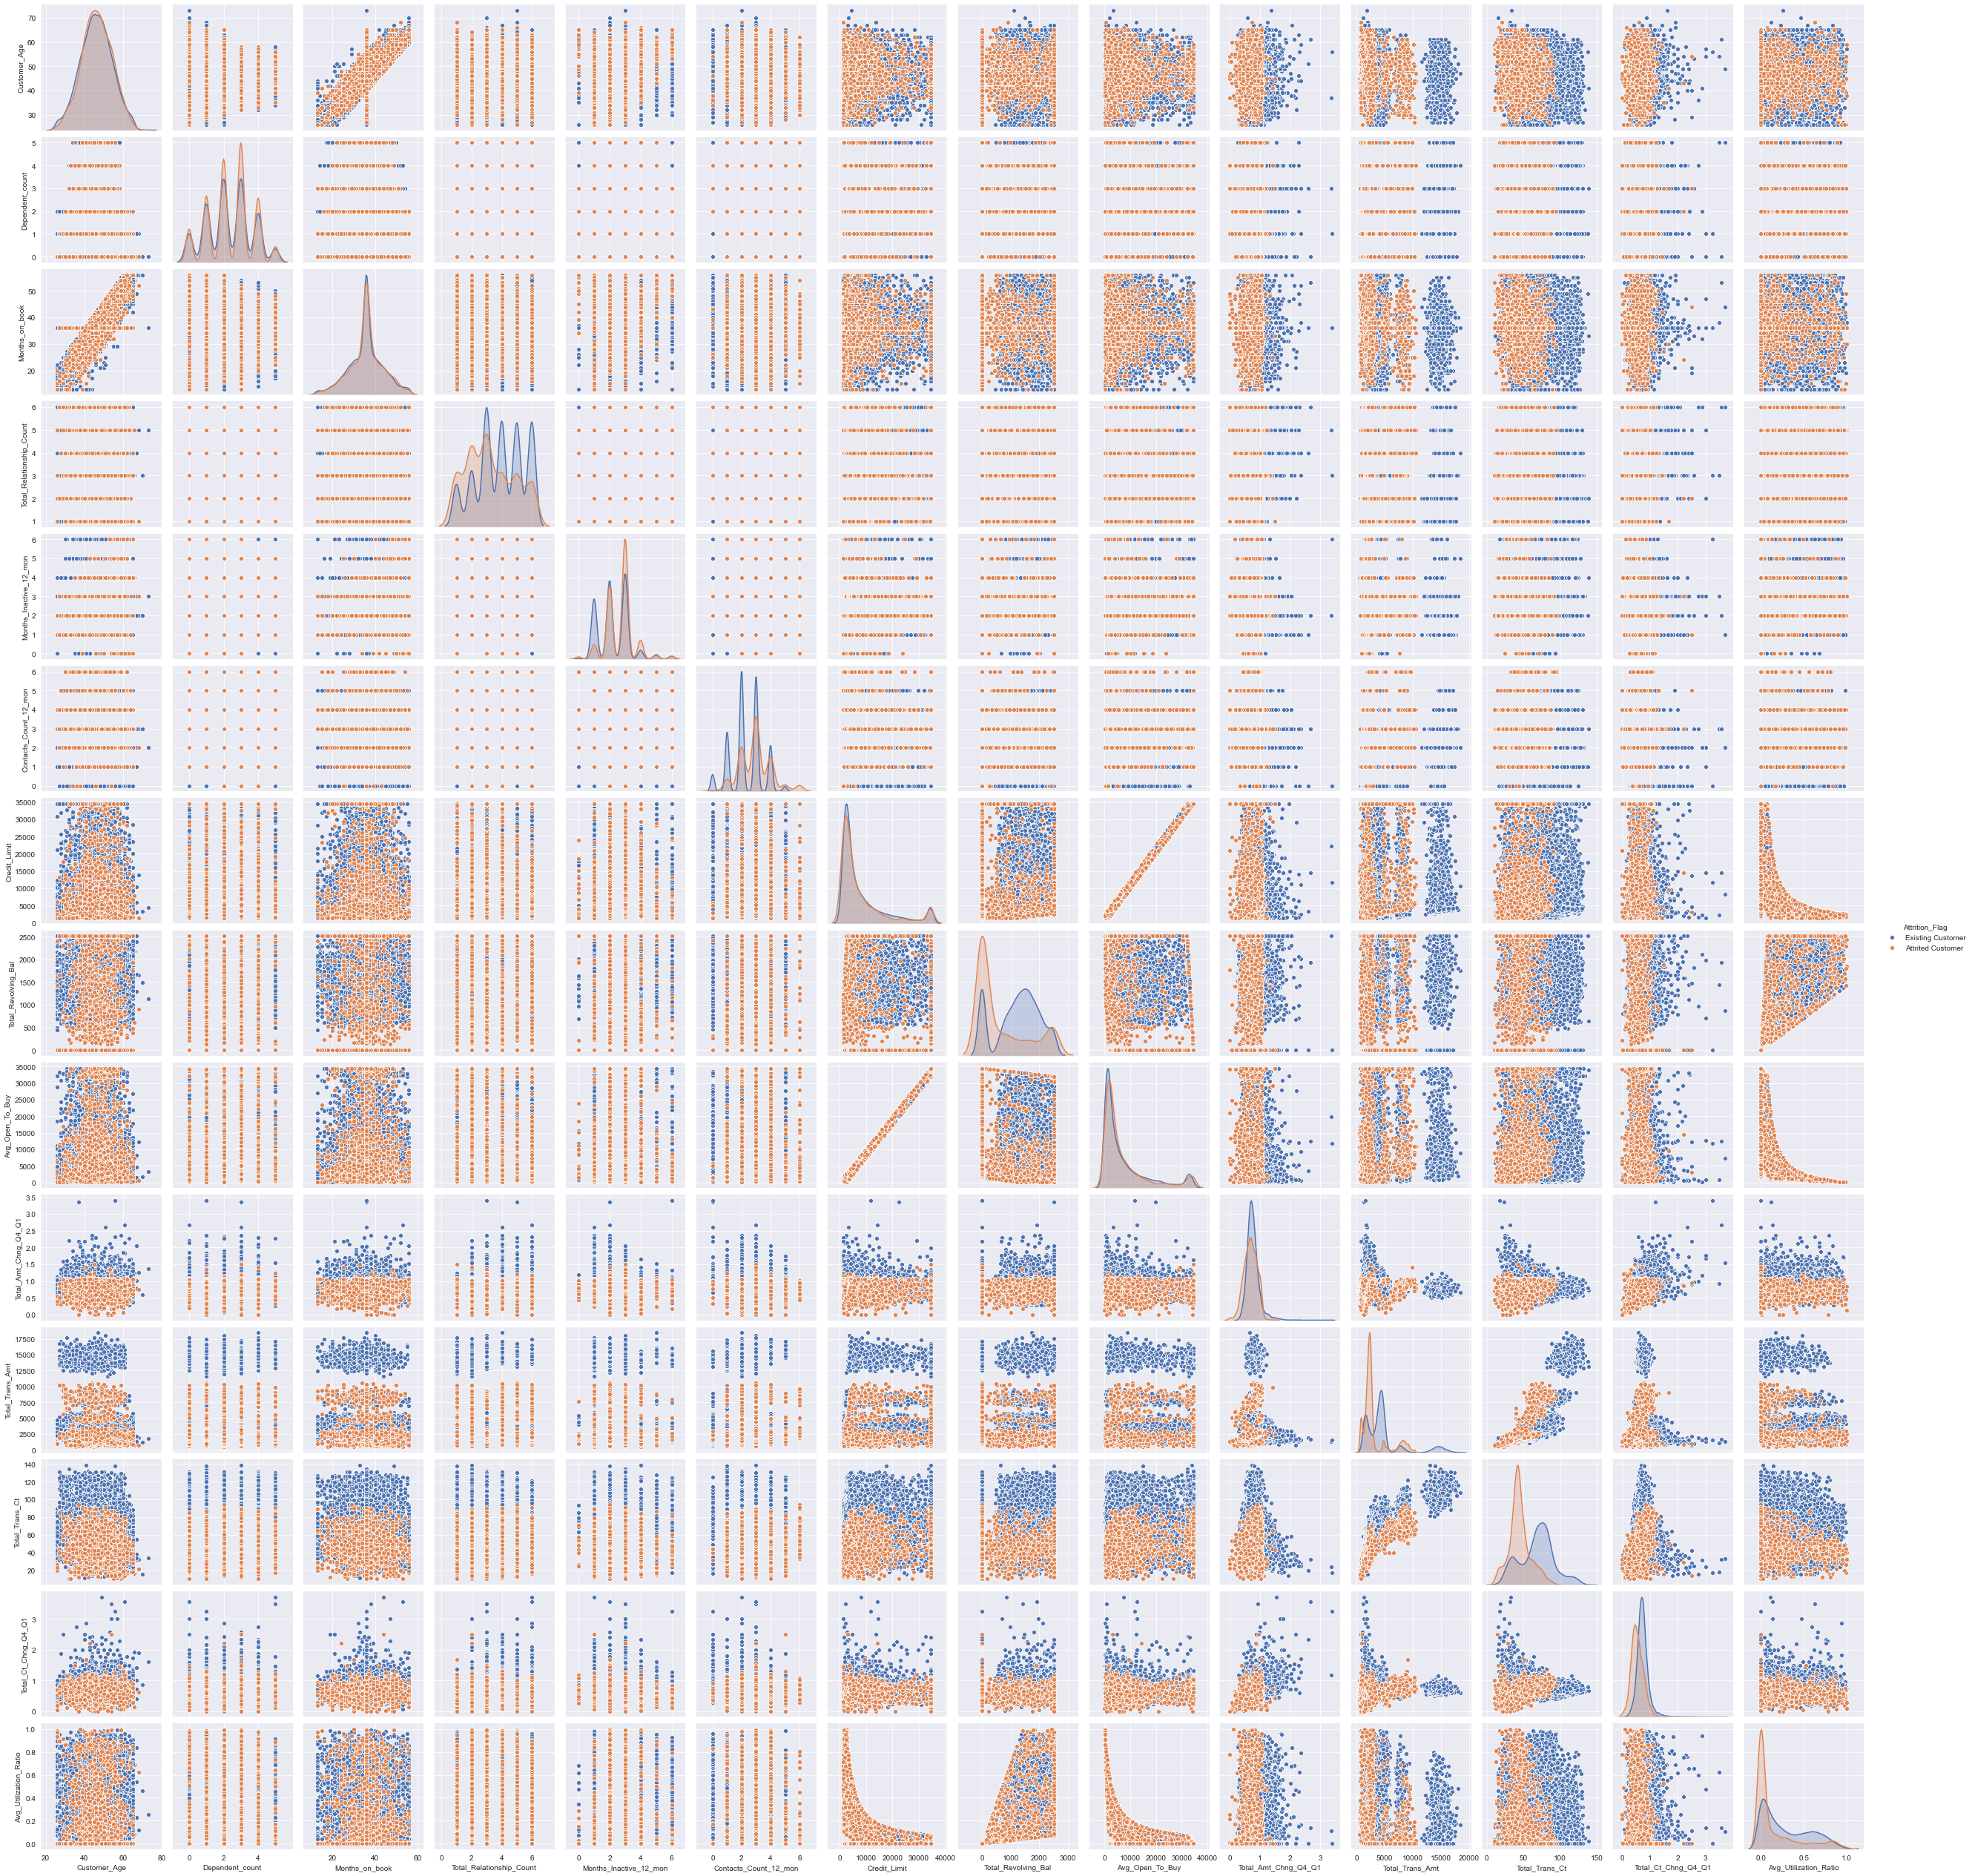

In [15]:
plt.figure(figsize = (13,13))
sns.pairplot(df, hue = 'Attrition_Flag')

Esta gráfica nos muestra las distintas relaciones existentes entre las variables del dataframe, en muchas de ellas se pueden observar cierta agrupación de los dos datos princpales que nos interesan, los clientes que siguen en el banco (azules) y los clientes que han abandonado el banco (naranja). Ademas en algunas de ellas se pueden observar ciertas tendencias lineales o en ciertos conjuntos un tipo de gráfica exponencial. 


In [16]:
import math

<ipython-input-17-bf8f616a9942>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], labels = ['Continúa', 'Abandonó'],


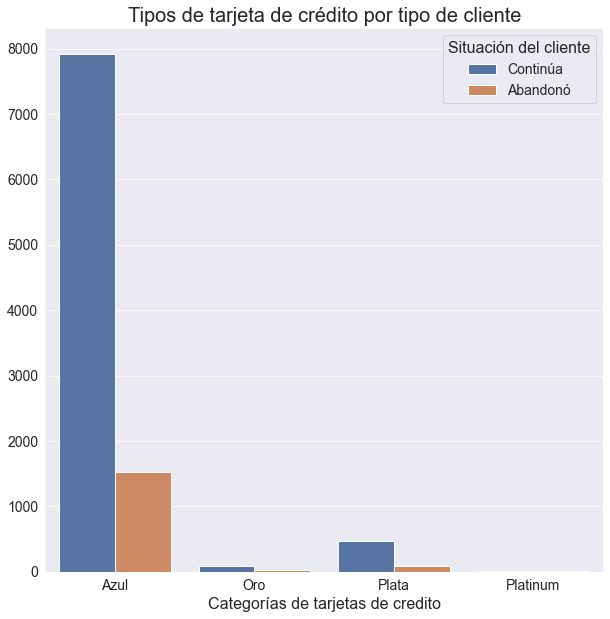

In [17]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Card_Category', hue = 'Attrition_Flag', data = df)
plt.xlabel('Categorías de tarjetas de credito', fontsize = 16)
plt.title('Tipos de tarjeta de crédito por tipo de cliente', fontsize = 20)
plt.xticks(ticks=[0,1,2,3], labels = ['Azul', 'Oro', 'Plata', 'Platinum'], fontsize = 14)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
           title = 'Situación del cliente', fontsize = 14,title_fontsize = 16);
plt.yticks(fontsize = 14)
plt.ylabel(None);

La gran mayoría de los clientes poseen una tarjeta de credito del tipo 'Azul', es posible que esto tenga cierto impacto al momento de implementar los algoritmos de machine learning para realizar la clasificación de datos.

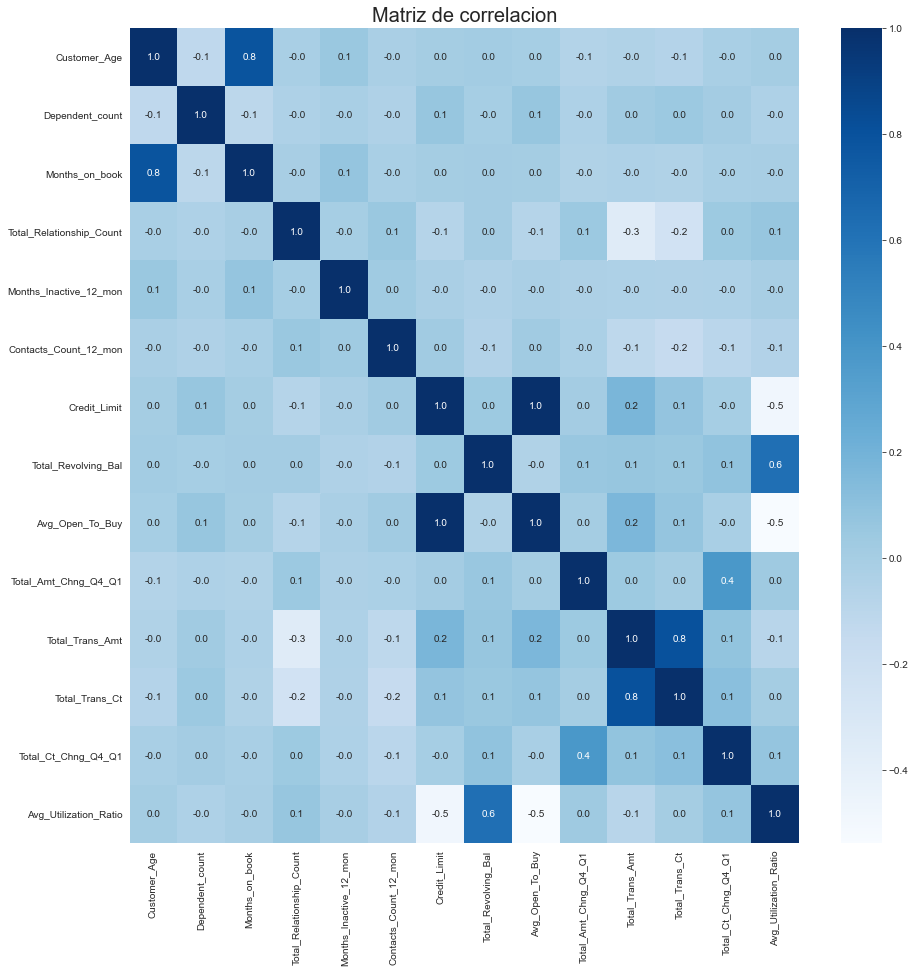

In [18]:
cor = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(cor, annot = True, fmt='.1f', cmap = 'Blues')
plt.title('Matriz de correlacion', fontsize = 20);

Con esta matriz de correlación podemos observar cual es el nivel de correlación de los distintos campos. Se observa que la gran mayoría de las variables no presentan una correlación clara a excepción de algunos casos como por ejemplo:

- *Months_on_book* y *Customer_Age* presentan una correlación altamente positiva, por lo que si una de ellas crece, la otra también, y si una decrece la otra lo hace en igual medida.
- *Avg_Utilization_Ratio* y *Credit_Limit* presentan una correlación negativa, por lo que si una de esas variables crece, la otra decrece y viceversa
- *Avg_Utilization_Ratio* y *Total_Revolving_Bal* presentan una correlación positiva
- *Avg_Utilization_Ratio* y *Avg_Open_To_Buy* presentan una correlación negativa
- *Total_Ct_Chng_Q4_Q1* y *Total_Trans_Ct* presentan una correlación positiva
- *Total_Trans_Ct* y *Total_Trans_Amt* presentan una correlación altamente positiva

Vamos a graficar las caracteristicas que mostraron mayor correlación

<ipython-input-19-be36e64a349b>:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
<ipython-input-19-be36e64a349b>:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
<ipython-input-19-be36e64a349b>:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
<ipython-input-19-be36e64a349b>:37: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
<ipython-input-19-be36e64a349b>:46: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
<ipython-input-19-be36e64a349b>:55: UserWarning: You have mixed positional and keyword argu

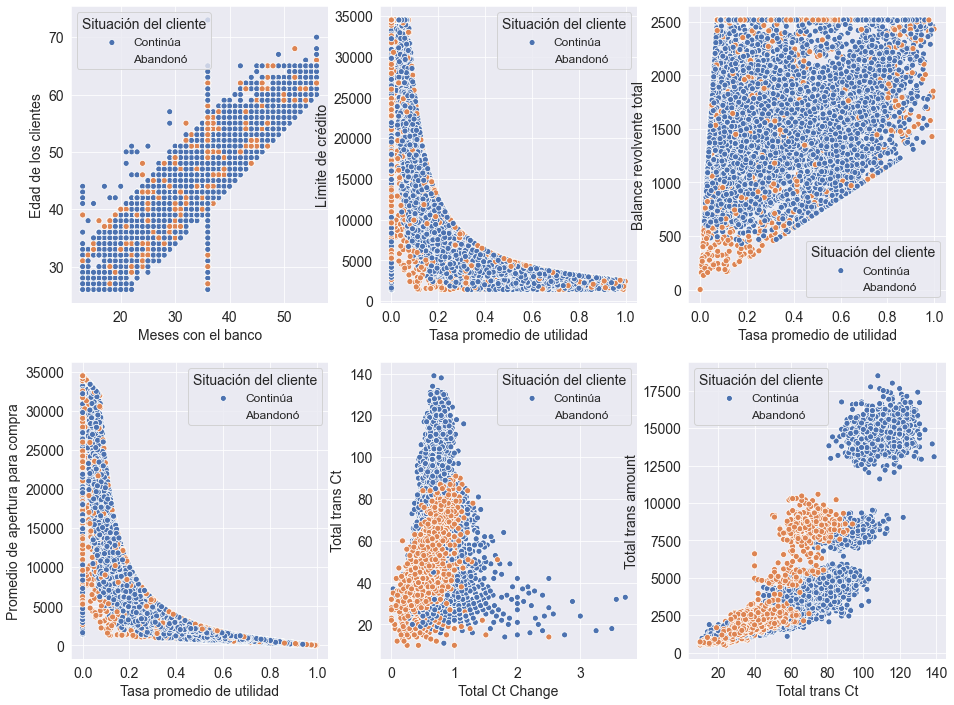

In [19]:
plt.figure(figsize = (18,12))
plt.subplot(2,3,1)
sns.scatterplot(x = 'Months_on_book', y = 'Customer_Age', hue = 'Attrition_Flag', data = df)
plt.xlabel('Meses con el banco', fontsize = 14)
plt.ylabel('Edad de los clientes', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
           title = 'Situación del cliente', fontsize = 12,title_fontsize = 14);
plt.subplot(2,3,2)
sns.scatterplot(x = 'Avg_Utilization_Ratio', y = 'Credit_Limit', hue = 'Attrition_Flag', 
                data = df)
plt.xlabel('Tasa promedio de utilidad', fontsize = 14)
plt.ylabel('Límite de crédito', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
           title = 'Situación del cliente', fontsize = 12,title_fontsize = 14);
plt.subplot(2,3,3)
sns.scatterplot(x = 'Avg_Utilization_Ratio', y = 'Total_Revolving_Bal', hue = 'Attrition_Flag', 
                data = df)
plt.xlabel('Tasa promedio de utilidad', fontsize = 14)
plt.ylabel('Balance revolvente total', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
           title = 'Situación del cliente', fontsize = 12,title_fontsize = 14);
plt.subplots_adjust(right = 0.8)

plt.subplot(2,3,4)
sns.scatterplot(x = 'Avg_Utilization_Ratio', y = 'Avg_Open_To_Buy',hue = 'Attrition_Flag',
               data = df)
plt.xlabel('Tasa promedio de utilidad', fontsize = 14)
plt.ylabel('Promedio de apertura para compra', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
          title = 'Situación del cliente', fontsize = 12, title_fontsize = 14);
plt.subplot(2,3,5)
sns.scatterplot(x = 'Total_Ct_Chng_Q4_Q1', y = 'Total_Trans_Ct',hue = 'Attrition_Flag',
               data = df)
plt.xlabel('Total Ct Change', fontsize = 14)
plt.ylabel('Total trans Ct', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
          title = 'Situación del cliente', fontsize = 12, title_fontsize = 14);
plt.subplot(2,3,6)
sns.scatterplot(x = 'Total_Trans_Ct', y = 'Total_Trans_Amt',hue = 'Attrition_Flag',
               data = df)
plt.xlabel('Total trans Ct', fontsize = 14)
plt.ylabel('Total trans amount', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend([0,1], labels = ['Continúa', 'Abandonó'],
          title = 'Situación del cliente', fontsize = 12, title_fontsize = 14);
#### Crear función para graficar las variables con mayor correlación de la matriz
#### de covarianza

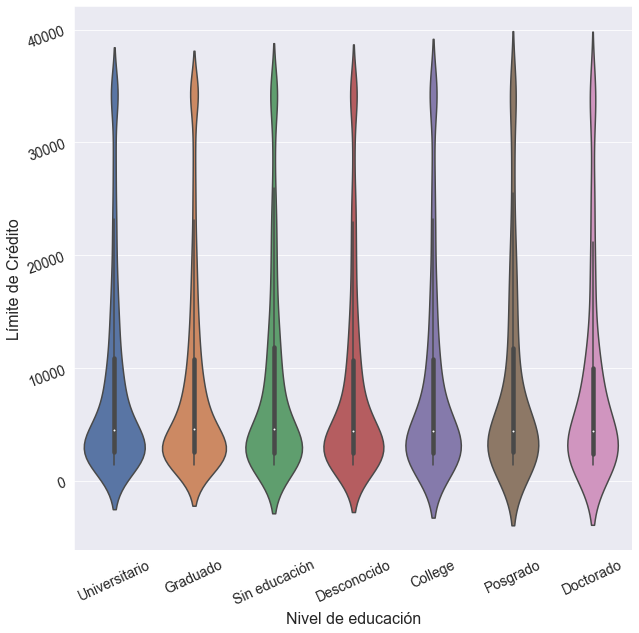

In [20]:
plt.figure(figsize = (10,10))
sns.violinplot(x = 'Education_Level', y = 'Credit_Limit', data = df)
plt.xlabel('Nivel de educación', fontsize = 16)
plt.ylabel('Límite de Crédito', fontsize = 16)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels = ['Universitario', 'Graduado', 'Sin educación',
                                            'Desconocido', 'College', 'Posgrado', 'Doctorado'],
          rotation = 25, fontsize = 14);
plt.yticks(fontsize = 14, rotation = 20);

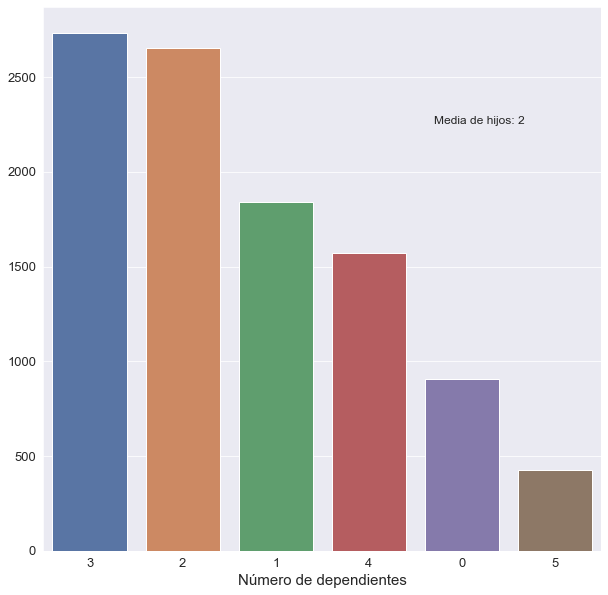

In [21]:
plt.figure(figsize = (10,10))
sns.countplot(df.Dependent_count, 
              order = df.Dependent_count.value_counts(ascending = False).index)
plt.xlabel("Número de dependientes", fontsize=15)
plt.ylabel(None)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.text(x=3.7, y = 2250, s = f'Media de hijos: {int(df.Dependent_count.median())}',
         fontsize = 12);

Con este análisis exploratorio de datos podemos obtener información relevante de nuestros datos. El primero es que existen valores desconocidos en algunos campos, los cuales seran eliminados de la base de datos para adaptar de mejor manera nuestro modelo de predicción.
Otra características relevantes que pudieron resaltarse en este análisis es que existe cierto agrupamiento en los datos de los dos grupos que queremos clasificar (clientes que aun se encuentran en el banco y clientes que abandonaron el banco). También se pudo observar la correlación existente en distintos campos de la base de datos dentro de los cuales se sigue observando el agrupamiento de los distintos grupos a clasificar.

Para comenzar con la implementación de distintos algoritmos de machine learning para la clasificación de los datos, haremos una limpieza de los datos para mejores resultados, para ello eliminaremos los datos desconocidos de los distintos campos.

In [22]:
df.replace('Unknown', np.NaN, inplace = True)

In [23]:
(df.isnull().sum().sum()/df.shape[0])*100

33.37612323491656

Si eliminamos todos los registros con información desconocida, perderemos alrededor del 33% de la información de nuestro dataset. Aun así contamos con información suficiente para trabajar, de manera que eliminaremos esta información.

In [24]:
df.dropna(inplace = True)

Una vez eliminados los registros con información desonocida, el siguiente paso el manejar la información categorica. En este caso existen algunos campos con información categorica que poseen cierto ordenamiento, por ejemplo el campo del nivel educativo, es claro que una persona con un posgrado o doctorado posee un nivel educativo superior que una persona universitaria o sin educación, por lo que le asignaremos un peso a esas caracteristicas. De igual manera trataremos otras características de esta manera por ejemplo: el ingreso y el tipo de tarjeta de credito con el que cuenta el cliente.



In [25]:
df.Education_Level.replace({'Uneducated':1, 'College': 2, 'High School': 3, 'Graduate': 4, 
                            'Post-Graduate':5, 'Doctorate':6}, inplace = True)
df.Income_Category.replace({'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3, '$80K - $120K':4,
                            '$120K +':5},inplace = True)
df.Card_Category.replace({'Blue':1,'Silver':2,'Gold':3,'Platinum':4}, inplace = True)

De igual manera existen otros campos que no poseen un cierto orden o nivel de importancia como los campos anteriores. Estos son el género del ciente o su estado civil, por lo que pasaremos estos datos categóricos a binarios.

In [26]:
g = pd.get_dummies(df.Gender)
m = pd.get_dummies(df.Marital_Status)
df = pd.concat([df, g, m], axis = 1)
df.drop('Gender', axis = 1, inplace = True)
df.drop('Marital_Status', axis = 1, inplace = True)

Por último la variable objetivo (situación del cliente), que es la variable que queremos predecir es una variable categórica que tambien la transformaremos en una variable binaria. Para ello cargamos las siguientes librerias. De esta manera ya contamos con todo el dataset en forma numérica, por lo que, los siguientes pasos serán sobre la construcción del modelo de predicción.

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [28]:
le = LabelEncoder()
le.fit(df.Attrition_Flag)
df.Attrition_Flag = le.transform(df.Attrition_Flag)

## Implementación de los modelos de predicción

Antes de comenzar con la construcción del modelo y recordando que existen una gran diferencia en la cantidad de clientes que siguen en el banco y clientes que han abandonado el banco, se deberá aplicar alguna técnica de muestreo de manera que reduzcamos el sesgo en los datos y obtengamos una mejor precisión en los algoritmos de predicción. Para ello utilizaremos la técnica de submuestreo, seleccionando la misma cantidad de datos del grupo menor, del grupo con mayor ejemplares.

In [29]:
count_0 = df.Attrition_Flag.value_counts()[0]
count_1 = df.Attrition_Flag.value_counts()[1]

#dividimos el dataset en grupos (dataset de personas que abandonaron el banco y dataset
#de personas que siguen en el banco)
df_0 = df[df.Attrition_Flag == 0] 
df_1 = df[df.Attrition_Flag == 1]

#tomamos una muestra del df con el número de clientes del submuestreo y creamos el nuevo
#dataframe con una cantidad balanceada de clientes que han dejado el banco y clientes que 
#siguen en el banco
df_1_under = df_1.sample(count_0)
df_under = pd.concat([df_1_under, df_0])

Text(0.95, 1113, '1113')

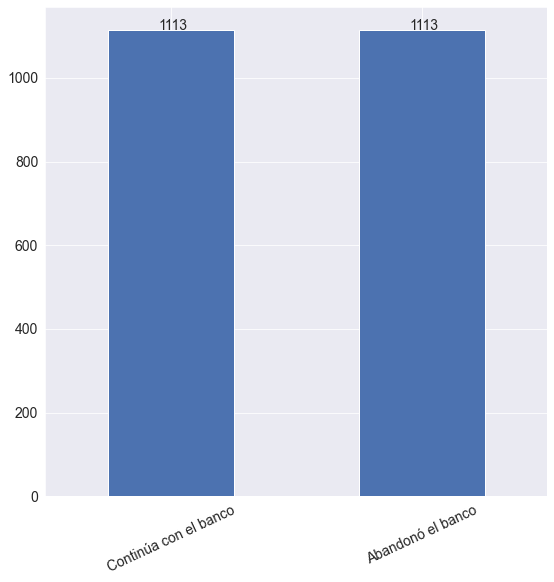

In [30]:
#Graficamos la nueva cantidad de datos de nuestro dataframe
plt.figure(figsize=(9,9))
df_under.Attrition_Flag.value_counts().plot(kind = 'bar')
plt.xticks(ticks = [0,1], labels=['Continúa con el banco', 'Abandonó el banco'], 
           rotation = 25, fontsize = 14)
plt.yticks(fontsize = 14)
plt.text(x = -0.05, y = df_under.Attrition_Flag.value_counts()[0], 
         s = f"{df_under.Attrition_Flag.value_counts()[0]}", fontsize = 14)
plt.text(x = 0.95, y = df_under.Attrition_Flag.value_counts()[1], 
         s = f"{df_under.Attrition_Flag.value_counts()[1]}", fontsize = 14)


Una vez realizado el muestreo, se observa con la gráfica anterior que los datos están balanceados (número de clientes que continuan en el banco es el mismo que la cantidad de clientes que han abandonado el banco).

El siguiente pasó será separar el nuevo dataser (submuestreado) en sus variables dependiente e independientes y separar estas variables en datasets de entrenamiento y de prueba.

Por último y para tener nuestro dataset listo para la construcción de modelos de predicción, haremos una estandarización de los datos, de modo que  no exista una gran diferencia en algunos valores de las variables independientes, puesto que puede afectar seriamente el desempeño del modelo.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_under[df_under.columns[1:]]
y = df_under[df_under.columns[0]]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.15)

De esta manera ya hemos obtenido nuestro dataset escalado y lo hemos separado en dataset de entrenamiento y de prueba

In [32]:
X_scaled

array([[-0.65846795, -1.03570681, -1.61974345, ..., -0.30106784,
        -0.98218914,  1.16107763],
       [-0.40677229,  0.49719436, -0.15852808, ..., -0.30106784,
         1.01813384, -0.86126885],
       [ 0.72585816, -0.26925623, -0.88913577, ..., -0.30106784,
         1.01813384, -0.86126885],
       ...,
       [-2.42033756, -1.8021574 , -0.15852808, ...,  3.32151056,
        -0.98218914, -0.86126885],
       [-0.28092447, -1.03570681, -0.15852808, ..., -0.30106784,
         1.01813384, -0.86126885],
       [-0.40677229, -0.26925623,  0.5720796 , ..., -0.30106784,
         1.01813384, -0.86126885]])

### _K-Nearest Neighbors_
Vamos a probar distintos algoritmos de ML para determinar cuál de ellos presenta un mejor desempeño. El primer algoritmo a probar será el k-Nearest Neighbors, es de los más sencillos de aplicar y es muy utilizado cuando se observan los grupos en el analisis exploratorio de los datos, cosa que se pudo notar cuando lo llevamos a cabo, para ello importamos las siguientes librerias.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

knnModel = KNeighborsClassifier(7)
knnModel.fit(x_train,y_train)
pre_knn = knnModel.predict(x_test)
acc_knn = accuracy_score(y_test,pre_knn)*100
print(f"La presición del modelo es de: {acc_knn}%")

La presición del modelo es de: 81.437125748503%


Observaremos también la matriz de confusión, puesto que nos interesa que la cantidad de falsos negativos (clientes que fueron identificados por el modelo como clientes que continuan en el banco pero lo han abandonado) se reduzca lo más que se pueda, ya que se requiere identificar de manera precisa aquellos clientes que planean abandonar el banco, de manera que los falsos positivos (clientes que fueron identificados por el modelo como clientes que van a abandonar el banco pero no lo son) no afectan tanto al desarrollo del modelo.

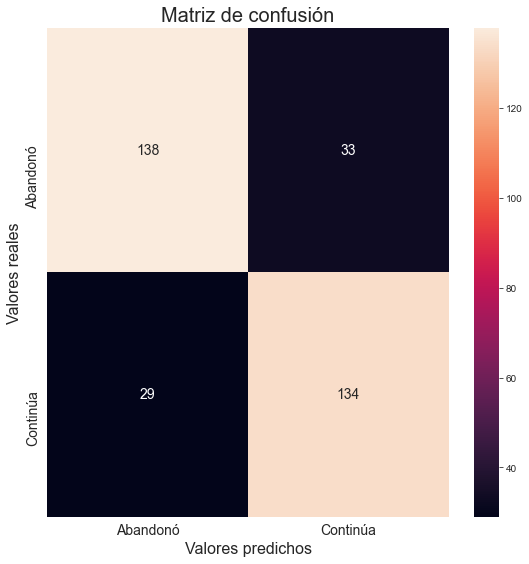

In [34]:
cm_knn = confusion_matrix(y_test,pre_knn)
plt.figure(figsize = (9,9))
sns.heatmap(cm_knn, annot = True, fmt = ".0f", annot_kws={"size": 14})
plt.xlabel('Valores predichos', fontsize = 16)
plt.ylabel('Valores reales', fontsize = 16)
plt.xticks(ticks = [0.5,1.5], labels = ['Abandonó', 'Continúa'], fontsize = 14)
plt.yticks(ticks = [0.5,1.5], labels = ['Abandonó', 'Continúa'], fontsize = 14)
plt.title('Matriz de confusión', fontsize = 20);

Nos interesa entonces que la sensitividad o recall de nuestro modelo sea lo más alta posible pues de esta forma, aseguraremos una reducción en la cantidad de falsos negativos del modelo, por ello calcularemos tanto la presición como el recall de cada modelo para determinar cual presenta un mejor desempeño.

In [35]:
from sklearn.metrics import recall_score

recall_knn = recall_score(y_test, pre_knn)*100
print(f"Reccal: {recall_knn:.2f}%")

Reccal: 82.21%


Hemos elegido un número aleatorio "_k_" de vecinos más cercanos, crearemos una función para determinar cual el mejor valor de dicho "_k_"

El número óptimo de vecinos más cercanos es: 19
Max accuracy = 83.53%
Max recall = 83.44%


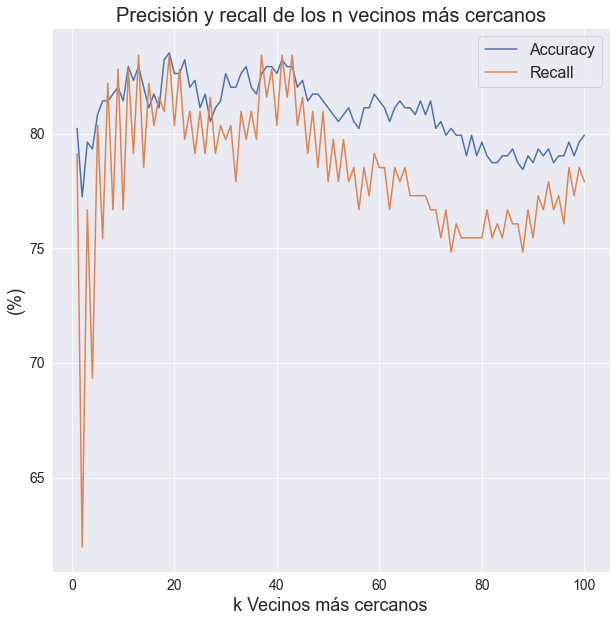

In [36]:
def knear(n,x_train,y_train,x_test,y_test):
    #n=número máximo de vecinos mas cercanos
    #x_train,y_train,x_test,y_test: datasets a evaluar
    #tomar en cuenta que se necesitan cargar las librerias de sklearn para usar esta función
    #cargar KNeighborsClassifier, metrics.accuracy_score
    pl1 = []
    pl2 = []
    ran = range(1,n+1)
    for i in ran:
        knnModel = KNeighborsClassifier(i)
        knnModel.fit(x_train,y_train)
        pre_knn = knnModel.predict(x_test)
        acc_knn = accuracy_score(y_test,pre_knn)*100
        pl1.append(acc_knn)
        recall_knn = recall_score(y_test, pre_knn)*100
        pl2.append(recall_knn)
    plt.figure(figsize = (10,10))
    plt.plot(ran, pl1, label = 'Accuracy')
    plt.plot(ran, pl2, label = 'Recall')
    plt.title('Precisión y recall de los n vecinos más cercanos', fontsize = 20)
    plt.xlabel('k Vecinos más cercanos', fontsize = 18)
    plt.ylabel('(%)', fontsize = 18)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize = 16)
    if max(pl1) > max(pl2):
        bp = pl1.index(max(pl1))+1 # Número de vecinos más cercanos con mayor desempeño
    else:
        bp = pl2.index(max(pl2))+1 # Número de vecinos más cercanos con mayor desempeño
    print(f"El número óptimo de vecinos más cercanos es: {bp}")
    print(f"Max accuracy = {max(pl1):.2f}%")
    print(f"Max recall = {max(pl2):.2f}%")
    return bp
    
n = knear(100,x_train,y_train,x_test,y_test)

En esta gráfica se muestra el desempeño del modelo con lo k vecinos más cercanos, se muestra la precisión y la sensitividad de los modelos con los distintos k vecinos más cercanos. La función además nos devuelve dicho número óptimo y del cual vamos a hacer uso para comparar el desempeño del modelo con los demás algoritmos de ML. Por lo que se calculará la precisión y sensitividad y se crearan nuevas variables para almacenar los distintos desempeños de los diferentes algoritmos de ML.

In [37]:
knnModel = KNeighborsClassifier(n)
knnModel.fit(x_train,y_train)
pre_knn = knnModel.predict(x_test)
acc_knn = accuracy_score(y_test,pre_knn)*100
recall_knn = recall_score(y_test, pre_knn)*100
accuracy_comp = []
accuracy_comp.append(acc_knn)
recall_comp = []
recall_comp.append(recall_knn)
print(f"La presición del modelo es de: {acc_knn}%")
print(f"Recall: {recall_knn:.2f}%")

La presición del modelo es de: 83.53293413173652%
Recall: 83.44%


### _Random Forests_
El siguiente algoritmo a probar es el algoritmo de _Random Forests_ ya que es un algoritmo que evita un overfitting en los datos, lo cual es muy importante a la hora de implementar el modelo entrenado para la obtención de mejores resultados, además es posible obtener las caracterísitcas que poseen un mayor impacto en el modelo al momento de realizar las clasificaciones.

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pre_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test,pre_rf)
recall_rf = recall_score(y_test,pre_rf)
print(f"Accuracy = {acc_rf:.2f}%")
print(f"Recall = {recall_rf:.2f}%")

Accuracy = 0.92%
Recall = 0.89%


Como se puede observar este es un muy buen algoritmo, ya que presenta un valor bastante alto de precisión y sensitividad, para este caso se utilizó un número de arboles de decisión de n = 100, crearemos otra función similar a la que se creó para el algoritmo anterior, en donde se prueba una cantidad n de distintos arboles de decisión, con la idea de encontrar la cantidad que muestre un mejor desempeño

El número óptimo de vecinos más cercanos es: 140
Max accuracy = 93.11%
Max recall = 90.18%


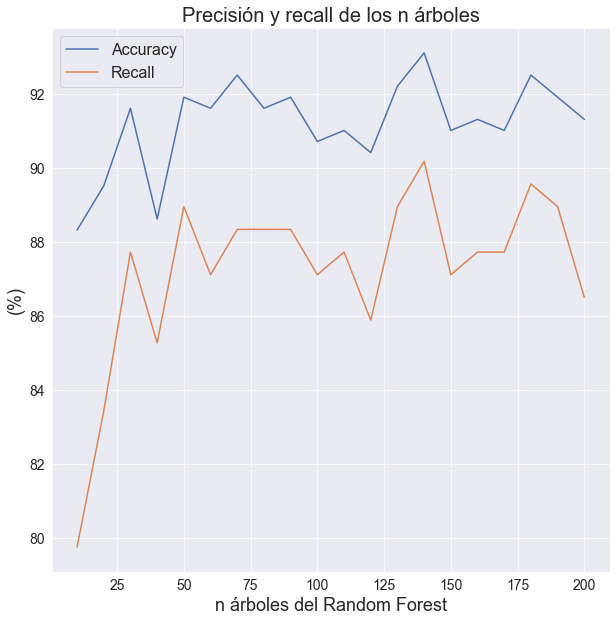

In [39]:
def randomfor(n,x_train,y_train,x_test,y_test,X):
    #Numero máximo de arboles de decisión
    #Saltos entre diferentes corridas del modelo de random forest
    #Para utilizar esta función se deben de cargar las librerias de sklearn
    #sklearn.ensemble.RandomForestClassifier
    ran = range(10,n+1,10)
    pl1 = []
    pl2 = []
    for i in ran:
        rf = RandomForestClassifier(i)
        rf.fit(x_train,y_train)
        pre_rf = rf.predict(x_test)
        acc_rf = accuracy_score(y_test,pre_rf)*100
        pl1.append(acc_rf)
        recall_rf = recall_score(y_test,pre_rf)*100
        pl2.append(recall_rf)
    plt.figure(figsize = (10,10))
    plt.plot(ran, pl1, label = 'Accuracy')
    plt.plot(ran, pl2, label = 'Recall')
    plt.title('Precisión y recall de los n árboles', fontsize = 20)
    plt.xlabel('n árboles del Random Forest', fontsize = 18)
    plt.ylabel('(%)', fontsize = 18)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize = 16)
    if max(pl1) > max(pl2):
        bp = (pl1.index(max(pl1))+1)*10 # Número de vecinos más cercanos con mayor desempeño
    else:
        bp = (pl2.index(max(pl2))+1)*10 # Número de vecinos más cercanos con mayor desempeño
    print(f"El número óptimo de vecinos más cercanos es: {bp}")
    print(f"Max accuracy = {max(pl1):.2f}%")
    print(f"Max recall = {max(pl2):.2f}%")
    imp = pd.Series(rf.feature_importances_,index = X.columns).sort_values(ascending = False)*100
    return imp  #devolvemos un array con la importancia de las variables
        
n_rand = randomfor(200,x_train,y_train,x_test,y_test,X)

La gráfica anterior nos muestra el número de árboles dentro del algoritmo de random forest que muestran un mejor desempeño o mayor valor de presición y recall al momento de segmentar los clientes. Una vez obtenido este valor de _"n"_ guardaremos su valor de presición y recall.

In [42]:
rf_model = RandomForestClassifier(140)
rf_model.fit(x_train,y_train)
pre_rf = rf_model.predict(x_test)
acc_rf = accuracy_score(y_test,pre_rf)*100
recall_rf = recall_score(y_test,pre_rf)*100
print(f"Accuracy = {acc_rf:.2f}%")
print(f"Recall = {recall_rf:.2f}%")
accuracy_comp.append(acc_rf)
recall_comp.append(recall_rf)

Accuracy = 91.92%
Recall = 88.96%


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text major ticklabel objects>)

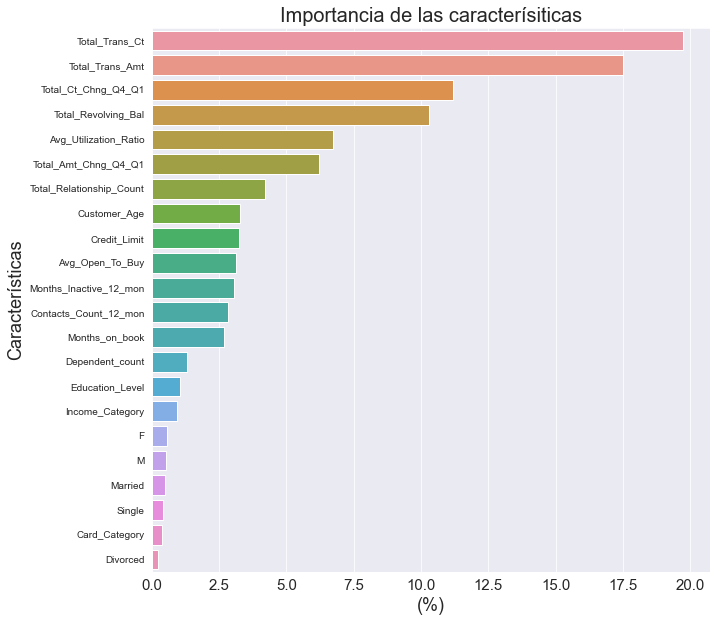

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(y = n_rand.index, x = n_rand)
plt.title('Importancia de las caracterísiticas', fontsize = 20)
plt.xlabel('(%)', fontsize = 18)
plt.ylabel('Características', fontsize = 18)
plt.xticks(fontsize = 15)

La gráfica anterior nos muestra el impacto que tienen las distintas variables al momento de realizar la clasificación de los clientes en clientes que abandonaron y continuan.

Se graficará su matriz de confusión para observar su capacidad de presición y recall.

## _Extreme Gradient Boosting_
El siguiente algoritmo a evaluar será el XGBoost ya que ha mostrado ser una gran opción para clasificar o predecir valores en distintas aplicaciones. Para ello cargamos las siguientes librerias y comenzamos a entrenar este modelo.

In [48]:
import xgboost as xgb
#Creamos nuestro modelo
boost_model = xgb.XGBClassifier(booster = "gbtree")
#Entrenamos con los datos 
boost_model.fit(x_train,y_train)
#Probamos el modelo y calculamos su presición y sensivilidad
pre_boost = boost_model.predict(x_test)
acc_boost = accuracy_score(y_test,pre_boost)*100
recall_boost = recall_score(y_test,pre_boost)*100
print(f"Accuracy = {acc_boost:.2f}%")
print(f"Recall = {recall_boost:.2f}%")

[21:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 91.02%
Recall = 90.18%


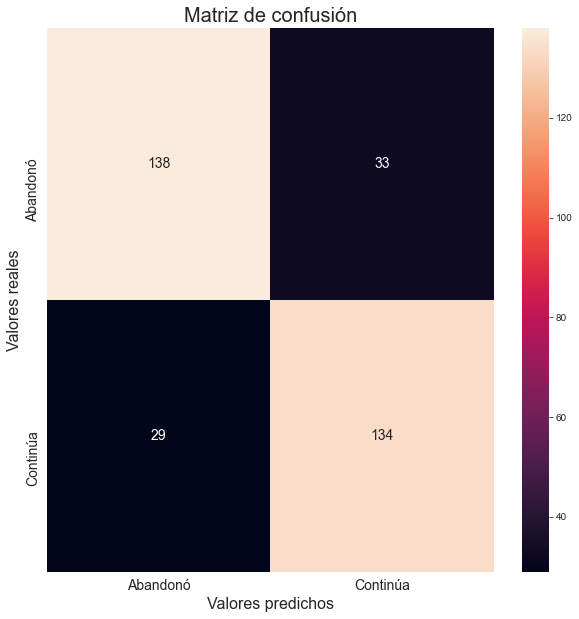

In [51]:
cm = confusion_matrix(y_test,pre_boost)
plt.figure(figsize = (10,10))
sns.heatmap(cm_knn, annot = True, fmt = ".0f", annot_kws={"size": 14})
plt.xlabel('Valores predichos', fontsize = 16)
plt.ylabel('Valores reales', fontsize = 16)
plt.xticks(ticks = [0.5,1.5], labels = ['Abandonó', 'Continúa'], fontsize = 14)
plt.yticks(ticks = [0.5,1.5], labels = ['Abandonó', 'Continúa'], fontsize = 14)
plt.title('Matriz de confusión', fontsize = 20);

Por ultimo compararemos el desempeño de cada uno de los modelos probados

In [52]:
accuracy_comp.append(acc_boost)
recall_comp.append(recall_boost)

In [63]:
comp_acc = pd.Series(accuracy_comp)
comp_recall = pd.Series(recall_comp)

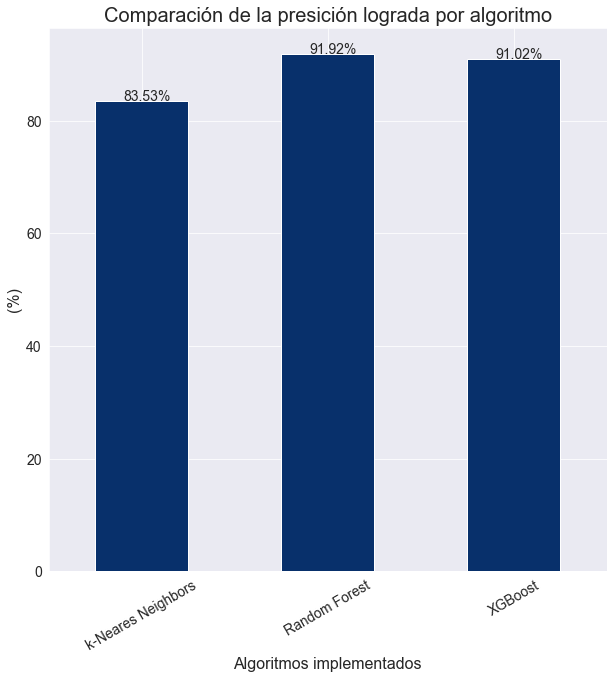

In [74]:
plt.figure(figsize = (10,10))
comp_acc.plot(kind = 'bar', cmap = 'Blues_r')
plt.xlabel('Algoritmos implementados', fontsize = 16)
plt.ylabel('(%)', fontsize = 16)
plt.title('Comparación de la presición lograda por algoritmo', fontsize = 20)
plt.xticks(ticks = [0,1,2], labels = ['k-Neares Neighbors', 'Random Forest', 'XGBoost'],
                                     rotation = 30, fontsize = 14);
plt.yticks(fontsize = 14)
for i in range(3):
    plt.text(x=i-0.1, y = comp_acc[i], s = f"{comp_acc[i]:.2f}%", fontsize = 14)

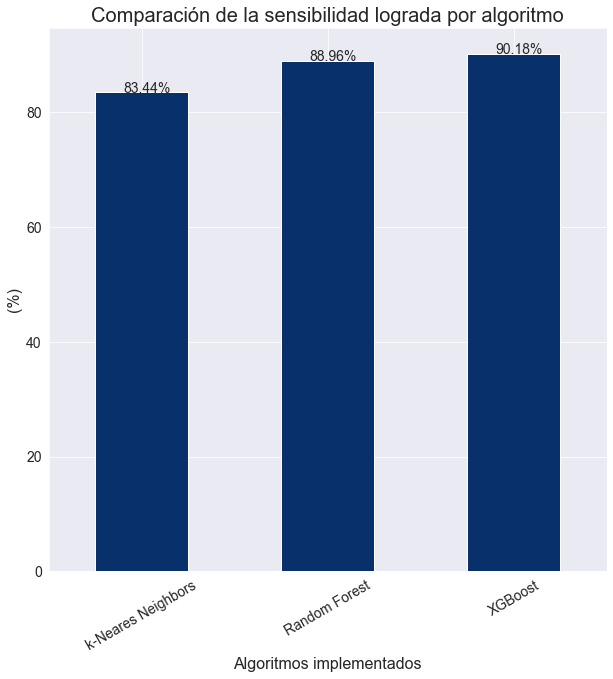

In [77]:
plt.figure(figsize = (10,10))
comp_recall.plot(kind = 'bar', cmap = 'Blues_r')
plt.xlabel('Algoritmos implementados', fontsize = 16)
plt.ylabel('(%)', fontsize = 16)
plt.title('Comparación de la sensibilidad lograda por algoritmo', fontsize = 20)
plt.xticks(ticks = [0,1,2], labels = ['k-Neares Neighbors', 'Random Forest', 'XGBoost'],
                                     rotation = 30, fontsize = 14);
plt.yticks(fontsize = 14)
for i in range(3):
    plt.text(x=i-0.1, y = comp_recall[i], s = f"{comp_recall[i]:.2f}%", fontsize = 14)